In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
data=pd.read_csv("F:/My Folder/Data Science/Project/Gender Classification/500_Person_Gender_Height_Weight_Index.csv")

In [4]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Gender    500 non-null object
Height    500 non-null int64
Weight    500 non-null int64
Index     500 non-null int64
dtypes: int64(3), object(1)
memory usage: 15.7+ KB


In [8]:
data.shape

(500, 4)

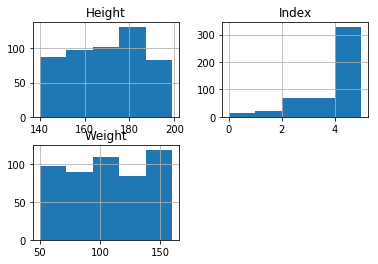

In [9]:
hist = data.hist(bins=5)

In [10]:
data.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


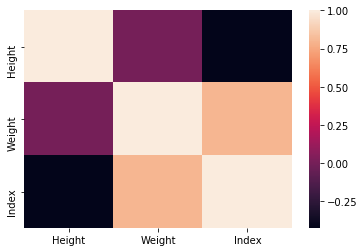

In [11]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [12]:

data.isnull().sum().sum()

0

In [13]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

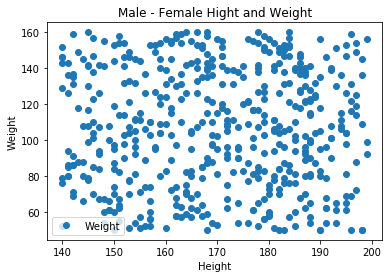

In [17]:
data.plot(x='Height', y='Weight', style='o')  
plt.title('Male - Female Hight and Weight')  
plt.xlabel('Height')  
plt.ylabel('Weight')  
plt.show()

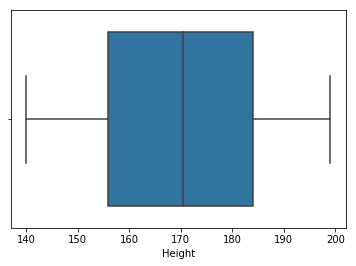

In [19]:

import seaborn as sns
sns.boxplot(x=data['Height'])

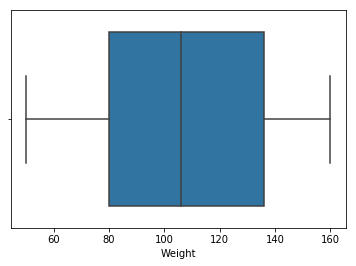

In [20]:
import seaborn as sns
sns.boxplot(x=data['Weight'])

In [151]:
x = data.iloc[:, 1:3].values
y = data.iloc[:,0].values

In [158]:
LE=LabelEncoder()
y=LE.fit_transform(y)

In [193]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [198]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=2)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')

In [199]:
y_pred=classifier.predict(x_test)
y_pred=LE.inverse_transform(y_pred)

In [200]:
score = classifier.score(x_test,y_test)

In [201]:
score

0.6